In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv('onlinefraud.csv')
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.duplicated().sum()


np.int64(0)

In [7]:
df["isFraud"].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
fraud = len(df[df['isFraud'] == 1])
legit = len(df[df['isFraud'] == 0])

print("Number of Fraud transactions: ", fraud)
print("Number of Legit transactions: ", legit)

Number of Fraud transactions:  8213
Number of Legit transactions:  6354407


In [9]:
import seaborn as sns

In [10]:
corr = df.corr(numeric_only=True)
corr

step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   
isFlaggedFraud  0.003277  0.012295       0.003835        0.003776   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.027665        0.025888  0.031578        0.003277  
amount                0.294137        0.459304  0.076688        0.012295  
oldbalanceOrg         0.066243        0.042029  0.010154        0.003835  
newbalanceOrig        0.067812        0.041837 -0.008148        0.003776  
oldbalanceDest        1.000000        0.976569 -0.005885       -0.000513  
newbalanceDest        0.976569        1.000000  0.000535       -0.000529  
isFraud              -0.005885        0.000535  1.000000        0.044109  
isFlaggedFraud       -0.000513       -0.000529  0.044109        1.000000

<Axes: >

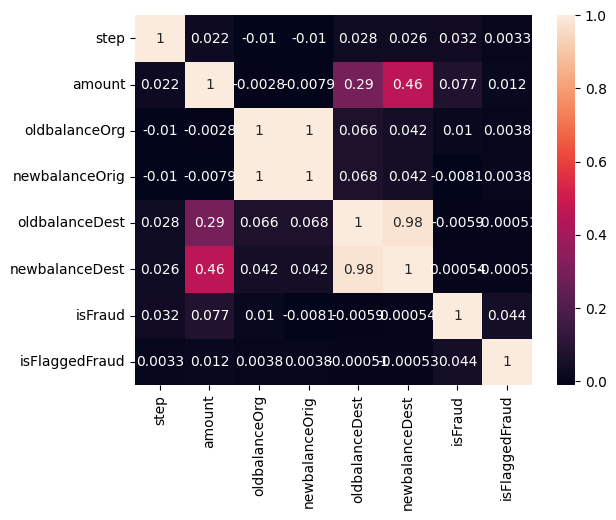

In [11]:
sns.heatmap(data=corr, annot=True)

In [12]:
df = df.drop(['step', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'], axis=1)
df.head()

type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2  TRANSFER    181.00  C1305486145          181.0            0.00   
3  CASH_OUT    181.00   C840083671          181.0            0.00   
4   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  isFraud  
0  M1979787155        0  
1  M2044282225        0  
2   C553264065        1  
3    C38997010        1  
4  M1230701703        0

In [13]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)
df.head()

type    amount  oldbalanceOrg  newbalanceOrig  isFraud
0   PAYMENT   9839.64       170136.0       160296.36        0
1   PAYMENT   1864.28        21249.0        19384.72        0
2  TRANSFER    181.00          181.0            0.00        1
3  CASH_OUT    181.00          181.0            0.00        1
4   PAYMENT  11668.14        41554.0        29885.86        0

In [ ]:
# CASH_OUT = 1, TRANSFER = 2, PAYMENT = 3, CASH_IN = 4, DEBIT = 5
df.loc[df.type == 'CASH_OUT', 'type'] = 1
df.loc[df.type == 'TRANSFER', 'type'] = 2
df.loc[df.type == 'PAYMENT', 'type'] = 3
df.loc[df.type == 'CASH_IN', 'type'] = 4
df.loc[df.type == 'DEBIT', 'type'] = 5